In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Import training dataset
df_train = pd.read_csv("C:/Users/z011348/Desktop/ML/input/rossmann-store-sales/train.csv",
                      parse_dates=["Date"])
df_train

C:\Users\z011348\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
df_train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [4]:
df_train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [5]:
df_train.SchoolHoliday.value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1          1
2          1
3          1
4          1
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: SchoolHoliday, Length: 1017209, dtype: int64>

In [6]:
df_train.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [7]:
df_train.Customers.value_counts()

0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4328         1
4894         1
4160         1
3972         1
3485         1
Name: Customers, Length: 4086, dtype: int64

In [4]:
df_train.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [8]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


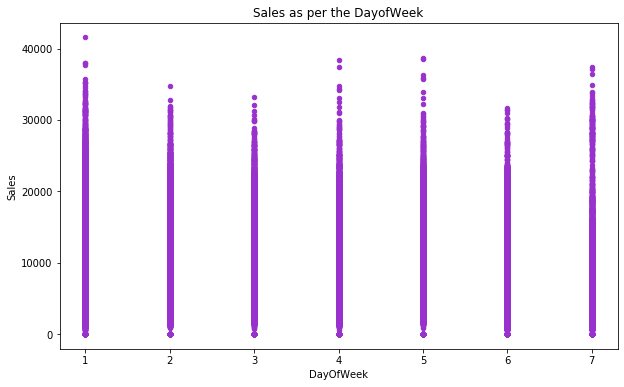

In [9]:
# Visualization - Sales as per the DayofWeek
fig, ax = plt.subplots(figsize=(10,6))
df_train.plot(kind='scatter',
             x='DayOfWeek',
             y='Sales',
             ax=ax,
             color='darkorchid')
ax.set(title="Sales as per the DayofWeek");

In [10]:
df_train_top10 = df_train.sort_values(by=["Sales"], ascending=False).head(10)
df_train_top10

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
44393,909,1,2015-06-22,41551,1721,1,0,0,0
132946,262,5,2015-04-03,38722,5132,1,1,b,0
101726,262,5,2015-05-01,38484,5458,1,1,a,0
87231,262,4,2015-05-14,38367,5192,1,0,a,1
424086,57,1,2014-06-16,38037,1970,1,1,0,0
627776,817,1,2013-12-16,38025,4381,1,1,0,0
627220,261,1,2013-12-16,37646,1964,1,1,0,0
444361,262,4,2014-05-29,37403,5297,1,0,a,0
620531,262,7,2013-12-22,37376,4916,1,0,0,0
245945,262,7,2014-12-21,37122,4962,1,0,0,0


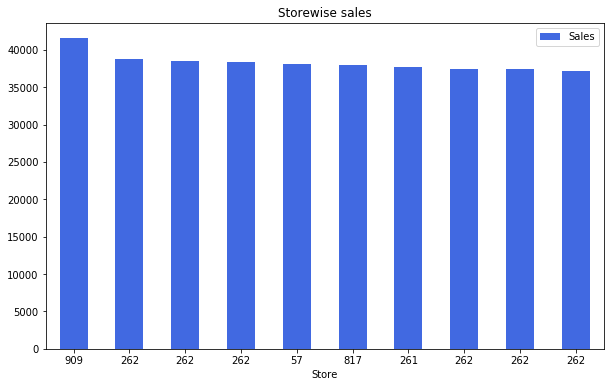

In [11]:
# Visualization - Storewise sales - top 10
fig, ax = plt.subplots(figsize=(10,6))
df_train_top10.plot(kind='bar',
             x='Store',
             y='Sales',
             ax=ax,
             color='royalblue')
ax.set(title="Storewise sales")
plt.xticks(rotation=0);

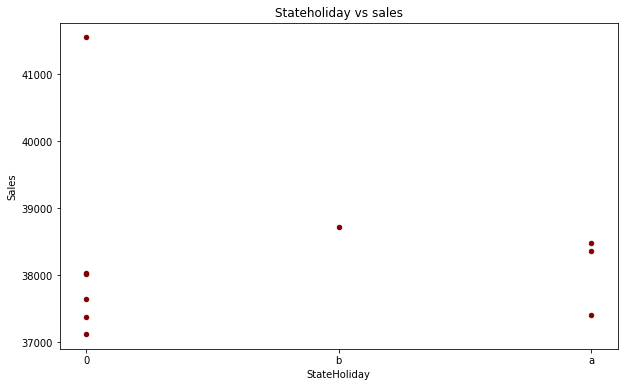

In [12]:
# Visualization - Stateholiday vs sales
fig, ax = plt.subplots(figsize=(10,6))
df_train_top10.plot(kind='scatter',
             x='StateHoliday',
             y='Sales',
             ax=ax,
             color='maroon')
ax.set(title="Stateholiday vs sales")
plt.xticks(rotation=0);

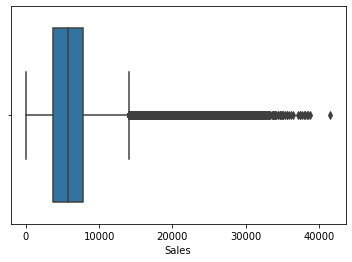

In [24]:
sns.boxplot(x=df_train["Sales"]);

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


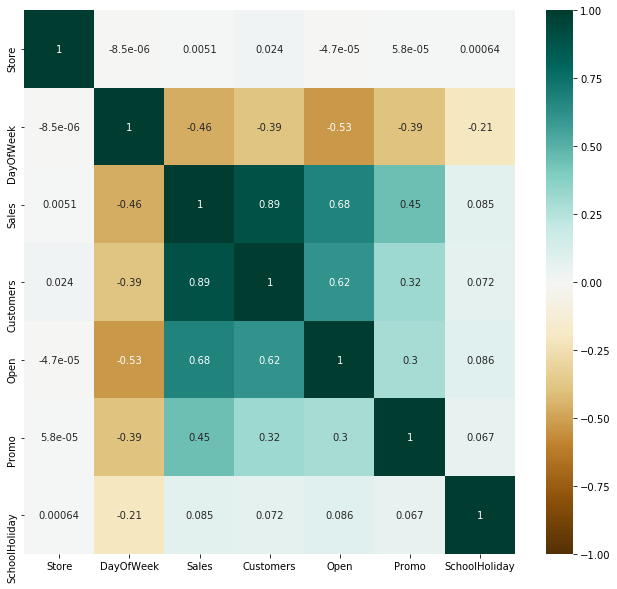

In [23]:
# Finding the relations between the variables.
plt.figure(figsize=(11,10))
c= df_train.corr()
sns.heatmap(c, annot=True, linewidths=0, vmin=-1, cmap="BrBG")
c

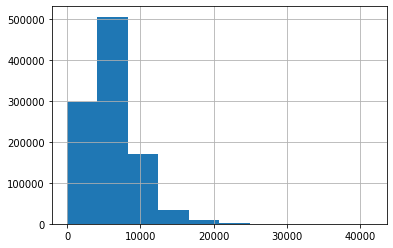

In [27]:
# Sales representation in hist
df_train.Sales.hist();

In [17]:
# Divide Date into year, month, day for better understanding of data 
df_train["Saleyear"] = df_train.Date.dt.year
df_train["Salemonth"] = df_train.Date.dt.month
df_train["Saleday"] = df_train.Date.dt.day
df_train.drop("Date", axis=1, inplace=True) # Drop Date coloumn
df_train


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Saleyear,Salemonth,Saleday
0,1,5,5263,555,1,1,0,1,2015,7,31
1,2,5,6064,625,1,1,0,1,2015,7,31
2,3,5,8314,821,1,1,0,1,2015,7,31
3,4,5,13995,1498,1,1,0,1,2015,7,31
4,5,5,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,2013,1,1
1017205,1112,2,0,0,0,0,a,1,2013,1,1
1017206,1113,2,0,0,0,0,a,1,2013,1,1
1017207,1114,2,0,0,0,0,a,1,2013,1,1


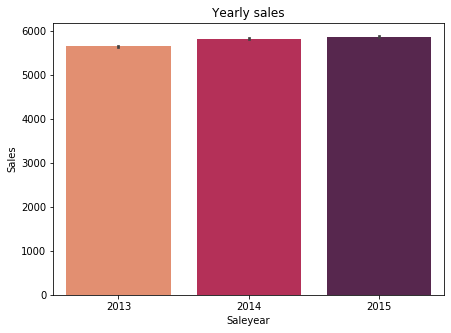

In [24]:
#create bar plot to check yearly sales
fig, ax = plt.subplots(figsize=(7,5))
plt.title('Yearly sales')
sns.barplot(x='Saleyear', y='Sales', data=df_train, palette='rocket_r');

In [71]:
# Number of sales monthwise for 2015
df_filter = df_train[df_train["Saleyear"] == 2015]
print(df_filter.head())
df_2015 = df_filter.groupby(["Salemonth"]).count()[["Sales"]].reset_index()
df_2015[:30]

   Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      2          5   6064        625     1      1            0   
2      3          5   8314        821     1      1            0   
3      4          5  13995       1498     1      1            0   
4      5          5   4822        559     1      1            0   

   SchoolHoliday  Saleyear  Salemonth  Saleday  
0              1      2015          7       31  
1              1      2015          7       31  
2              1      2015          7       31  
3              1      2015          7       31  
4              1      2015          7       31  


,Salemonth,Sales
0,1,34565
1,2,31220
2,3,34565
3,4,33450
4,5,34565
5,6,33450
6,7,34565


In [72]:
# Number of sales monthwise for 2014
df_filter = df_train[df_train["Saleyear"] == 2014]
print(df_filter.head())
df_2014 = df_filter.groupby(["Salemonth"]).count()[["Sales"]].reset_index()
df_2014[:30]

        Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
236380      1          3   2605        327     1      0            0   
236381      2          3   2269        252     1      0            0   
236382      3          3   3804        408     1      0            0   
236383      4          3  10152       1311     1      0            0   
236384      5          3   1830        217     1      0            0   

        SchoolHoliday  Saleyear  Salemonth  Saleday  
236380              1      2014         12       31  
236381              1      2014         12       31  
236382              1      2014         12       31  
236383              1      2014         12       31  
236384              1      2014         12       31  


,Salemonth,Sales
0,1,34565
1,2,31220
2,3,34565
3,4,33450
4,5,34565
5,6,33450
6,7,28985
7,8,28985
8,9,28050
9,10,28985


In [73]:
# Number of sales monthwise for 2014
df_filter = df_train[df_train["Saleyear"] == 2013]
print(df_filter.head())
df_2013 = df_filter.groupby(["Salemonth"]).count()[["Sales"]].reset_index()
df_2013[:30]

        Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
610235      1          2   2362        298     1      0            0   
610236      2          2   2148        268     1      0            0   
610237      3          2   4081        463     1      0            0   
610238      4          2   9813       1323     1      0            0   
610239      5          2   2009        241     1      0            0   

        SchoolHoliday  Saleyear  Salemonth  Saleday  
610235              1      2013         12       31  
610236              1      2013         12       31  
610237              1      2013         12       31  
610238              1      2013         12       31  
610239              1      2013         12       31  


,Salemonth,Sales
0,1,34564
1,2,31220
2,3,34565
3,4,33450
4,5,34565
5,6,33450
6,7,34565
7,8,34565
8,9,33450
9,10,34565


In [103]:
# Yearly sales count
df_yearly = df_train.groupby(["Saleyear"]).count()[["Sales"]].reset_index()
df_yearly

,Saleyear,Sales
0,2013,406974
1,2014,373855
2,2015,236380


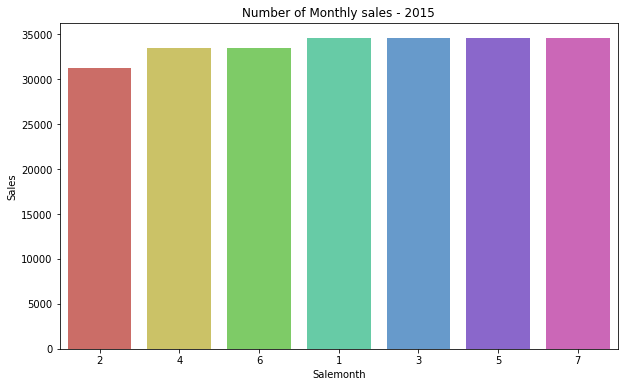

In [153]:
#df_grp.plot(kind='bar');
#create bar plot to check monthly sales for 2015 (low to high)
fig, ax = plt.subplots(figsize=(10,6))
#df_grp.plot(kind='bar');
plt.title('Number of Monthly sales - 2015')
sns.barplot(x='Salemonth', 
            y='Sales', 
            data=df_2015, 
            order=df_2015.sort_values('Sales').Salemonth,
            palette='hls');

In [ ]:
# Number of sales yearwise
df_grp = df_train.groupby(["Salemonth"]).count()[["Sales"]].reset_index()
df_grp[:30]

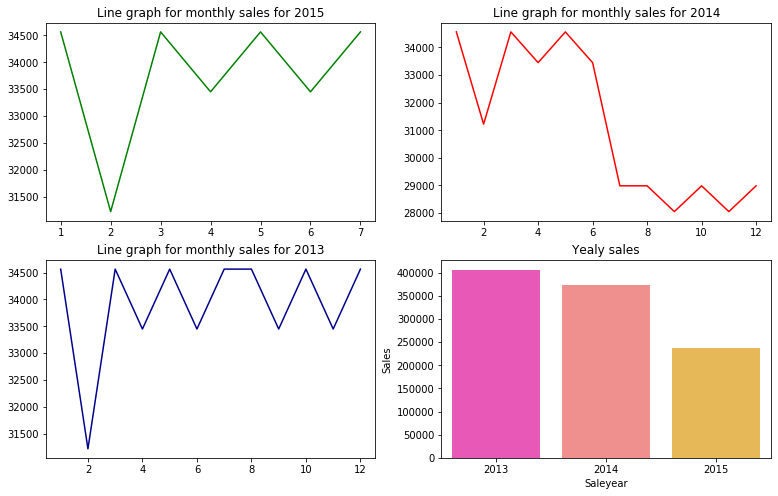

In [122]:
# Multiple plots
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2,
                                           ncols=2,
                                           figsize=(13,8))
#- plot for each for axis
ax1.plot(df_2015['Salemonth'], df_2015['Sales'], color='green')
ax1.set(title="Line graph for monthly sales for 2015")
#ax1.set_xticklabels(df_2015['Salemonth'])

ax2.plot(df_2014['Salemonth'], df_2014['Sales'], color='red')
ax2.set(title="Line graph for monthly sales for 2014")

ax3.plot(df_2013['Salemonth'], df_2013['Sales'], color='darkblue')
ax3.set(title="Line graph for monthly sales for 2013")

ax4=sns.barplot(x='Saleyear', y='Sales', data=df_yearly, palette='spring');
ax4.set(title="Yealy sales");

In [125]:
df_train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Saleyear,Salemonth,Saleday
0,1,5,5263,555,1,1,0,1,2015,7,31
1,2,5,6064,625,1,1,0,1,2015,7,31
2,3,5,8314,821,1,1,0,1,2015,7,31
3,4,5,13995,1498,1,1,0,1,2015,7,31
4,5,5,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,2013,1,1
1017205,1112,2,0,0,0,0,a,1,2013,1,1
1017206,1113,2,0,0,0,0,a,1,2013,1,1
1017207,1114,2,0,0,0,0,a,1,2013,1,1


In [183]:
# Pulic holidays in months - 2015
df_tmp = df_train[df_train["Saleyear"] == 2015] 
df_tmp = df_tmp[df_tmp["StateHoliday"] != '0'] 
df_tmp = df_tmp[df_tmp["StateHoliday"] != 0]
#df_tmp = df_tmp[df_tmp["StateHoliday"] != 0]

print(df_tmp.StateHoliday.value_counts())
print(df_tmp.StateHoliday.dtype)
df_statehol = df_tmp.groupby(["Salemonth"]).count()[["StateHoliday"]].reset_index()
df_statehol

a    5499
b    2230
Name: StateHoliday, dtype: int64
object


,Salemonth,StateHoliday
0,1,1388
1,4,2230
2,5,3345
3,6,766


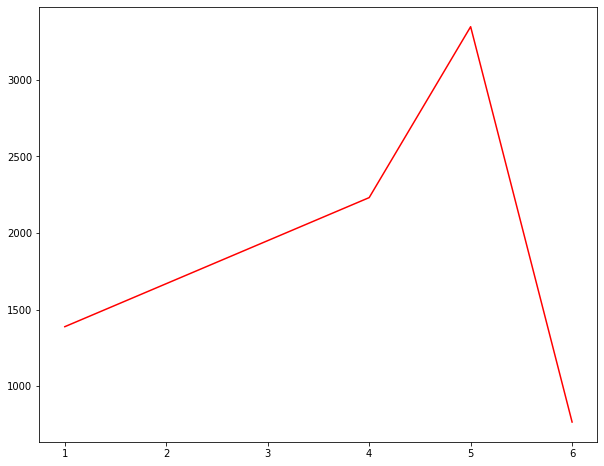

In [190]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df_statehol['Salemonth'], df_statehol['StateHoliday'], color='red');

In [186]:
# Stores/dates affected on SchoolHoliday in months - 2015
df_tmp = df_train[df_train["Saleyear"] == 2015] 
df_schoolhol = df_tmp[df_tmp["SchoolHoliday"] != 0] 
df_schoolhol = df_tmp.groupby(["Salemonth"]).count()[["SchoolHoliday"]].reset_index()
df_schoolhol

,Salemonth,SchoolHoliday
0,1,34565
1,2,31220
2,3,34565
3,4,33450
4,5,34565
5,6,33450
6,7,34565
